In [ ]:
#Sentiment Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download ('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudik_000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.test import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomFOrestClassifier
from sklearn.metrics import confusion_matrix, ConsionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisonTreeClassifier
from xgboost import XBGClassifier
import pickle
import re

ModuleNotFoundError: No module named 'sklearn.feature_extraction.test'

In [ ]:
pip install wordcloud


In [4]:
from wordcloud import WordCloud
print("WordCloud module imported successfully!")


WordCloud module imported successfully!


In [5]:
pip install xgboost


In [6]:
from xgboost import XGBClassifier
print("XGBoost module imported successfully!")


XGBoost module imported successfully!


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer  # Correct import
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Fixed typo in RandomFOrestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Fixed typo in ConsionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier  
from xgboost import XGBClassifier 
import pickle
import re


In [8]:
#EDA

In [9]:
data = pd.read_csv("amazon_alexa.tsv", delimiter =  '\t', quoting = 3)
print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [10]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [11]:
#coloumn name
print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [12]:
#Checking for null value
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [13]:
#Getting the record where 'Verified_reviews' is null

data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [14]:
#drop this record

data.dropna(inplace = True)

In [15]:
print(f"Dataset shape : {data.shape}")

Dataset shape : (3149, 5)


In [16]:
#Creating new column whe the lenght of string is mentioned

data['length'] = data['verified_reviews'].apply(len)

In [17]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [18]:
#random check

print(f"Verified_reviews' column value: {data.iloc[10]['verified_reviews']}")
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}")
print(f"'length'column value : {data.iloc[10]['length']}")
      

Verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length'column value : 65


In [19]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [21]:
len(data)

3149

In [20]:
#Analyzing rating columns
print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
5    2286
4     455
1     161
3     152
2      95
Name: rating, dtype: int64


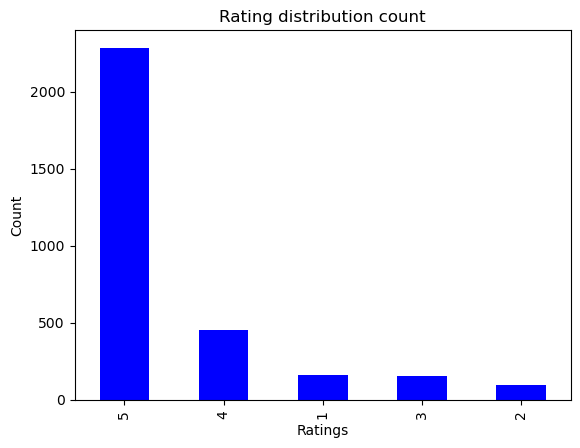

In [23]:
#Bar plot to visulize the total counts of each rating

data['rating'].value_counts().plot.bar(color = 'blue')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

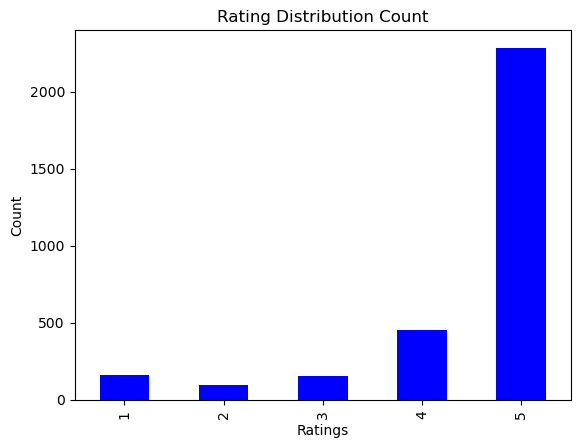

In [24]:
# Sort the ratings in ascending order and plot
data['rating'].value_counts().sort_index().plot.bar(color='blue')

plt.title('Rating Distribution Count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()


In [25]:
#Finding the percentage of each rating

print(f"Rating value count - precentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")


Rating value count - precentage distribution: 
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: rating, dtype: float64


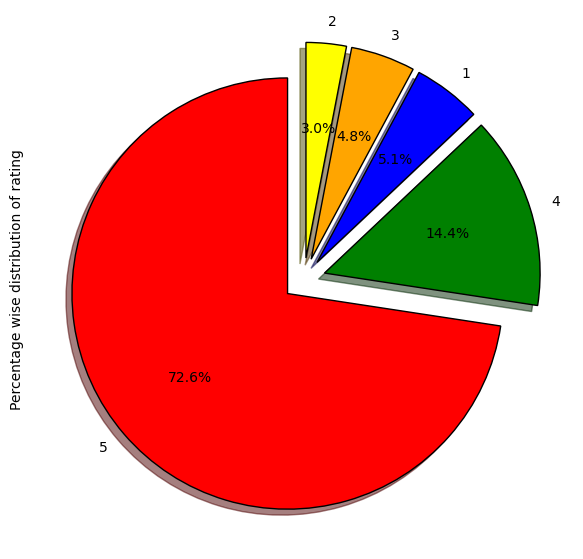

In [26]:
#Pie chart

fig = plt.figure(figsize=(7,7))
colors = ('red','green','blue','orange','yellow')
wp= {'linewidth':1 , "edgecolor":'black'}
tags = data['rating'].value_counts()/data.shape[0]
explode = (0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie' , autopct = "%1.1f%%" , shadow = True , colors = colors ,startangle = 90 , wedgeprops = wp, explode=explode, label= 'Percentage wise distribution of rating')
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format = "png")

In [ ]:
#Analzing feedback column

In [ ]:
#Distinct values of 'feedback' and its count

print(f"Feedback value count:)\n{data['fr']}